**Task 2**

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


Load Data

In [2]:
df = pd.read_csv("/content/train.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

print(df.head())
print(df.info())


        Store  Dept       Date  Weekly_Sales  IsHoliday
0           1     1 2010-02-05      24924.50      False
277665     29     5 2010-02-05      15552.08      False
277808     29     6 2010-02-05       3200.22      False
277951     29     7 2010-02-05      10820.05      False
278094     29     8 2010-02-05      20055.64      False
<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 16.5 MB
None


Basic EDA

In [3]:
print("Missing Values:\n", df.isnull().sum())
print("Statistics:\n", df.describe())


Missing Values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Statistics:
                Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375360   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales  
count  421570.000000  
mean    15981.258123  
min     -4988.940000  
25%      2079.650000  
50%      7612.030000  
75%     20205.852500  
max    693099.360000  
std     22711.183519  


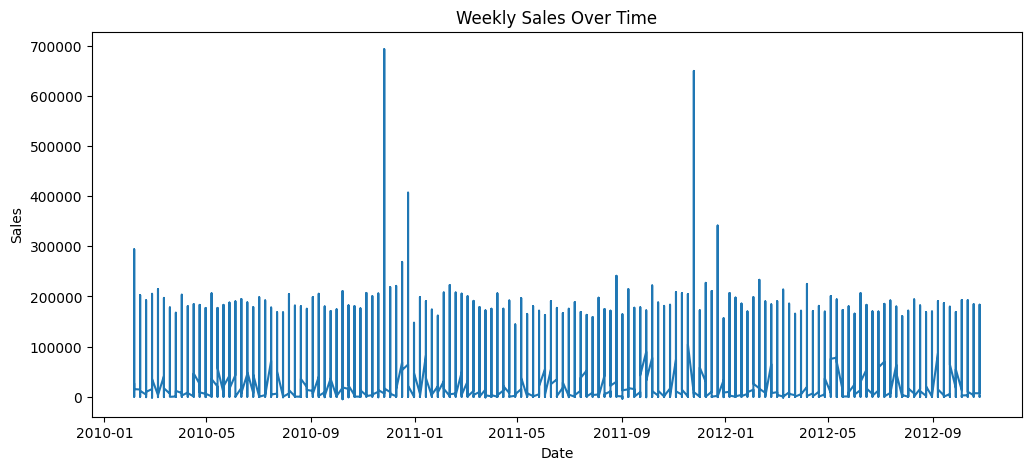

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Weekly_Sales'])
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


Feature Engineering

In [5]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week
df['day'] = df['Date'].dt.day


In [6]:
df['lag_1'] = df['Weekly_Sales'].shift(1)
df['lag_2'] = df['Weekly_Sales'].shift(2)
df['lag_4'] = df['Weekly_Sales'].shift(4)


In [7]:
df['rolling_mean_4'] = df['Weekly_Sales'].rolling(4).mean()
df['rolling_std_4'] = df['Weekly_Sales'].rolling(4).std()


In [8]:
df = df.dropna()


Feature Engineering

In [9]:
features = [
    'year', 'month', 'week', 'day',
    'lag_1', 'lag_2', 'lag_4',
    'rolling_mean_4', 'rolling_std_4'
]

X = df[features]
y = df['Weekly_Sales']


Time-Based Train/Test Split

In [10]:
split_date = "2012-01-01"

X_train = X[df['Date'] < split_date]
X_test = X[df['Date'] >= split_date]

y_train = y[df['Date'] < split_date]
y_test = y[df['Date'] >= split_date]


Model 1: Linear Regression

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


Model 2: Random Forest

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


Evaluation Function

In [13]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name} Performance:")
    print("MAE:", mae)
    print("RMSE:", rmse)

    return mae, rmse


Evaluate Both Models

In [14]:
lr_mae, lr_rmse = evaluate_model(y_test, lr_pred, "Linear Regression")
rf_mae, rf_rmse = evaluate_model(y_test, rf_pred, "Random Forest")



Linear Regression Performance:
MAE: 9853.703867750655
RMSE: 15584.446761605615

Random Forest Performance:
MAE: 9918.06729802021
RMSE: 16061.191719042798


Compare Models

In [15]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [lr_mae, rf_mae],
    "RMSE": [lr_rmse, rf_rmse]
})

print("\nModel Comparison:")
print(comparison)



Model Comparison:
               Model          MAE          RMSE
0  Linear Regression  9853.703868  15584.446762
1      Random Forest  9918.067298  16061.191719


Plot Actual vs Predicted (Best Model)

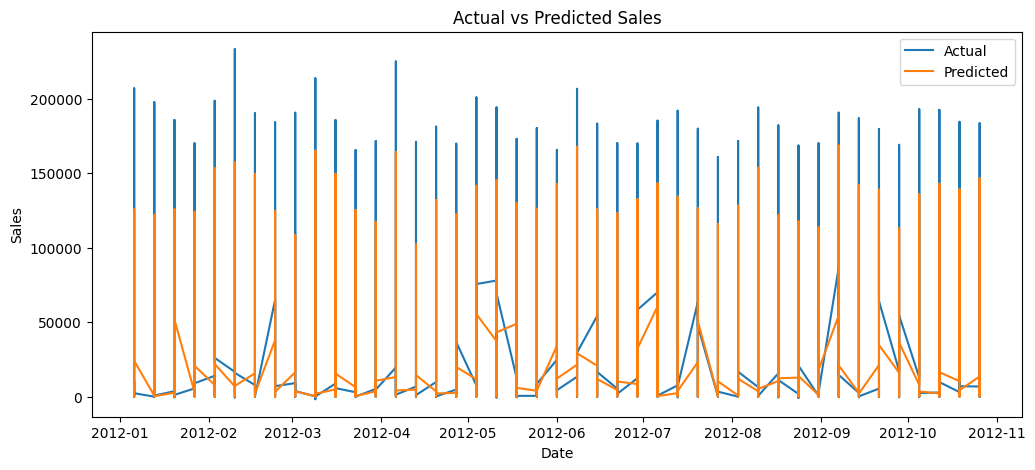

In [16]:
plt.figure(figsize=(12,5))

plt.plot(df['Date'][df['Date'] >= split_date], y_test, label='Actual')
plt.plot(df['Date'][df['Date'] >= split_date], rf_pred, label='Predicted')

plt.title("Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
